<a href="https://colab.research.google.com/github/Srisailam-Jeripothula/Data_Projects/blob/main/Bank_Transactions_Fruad_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Transaction Profiling & Fraud Risk Analysis

---

## Overview

This project presents an end-to-end transaction profiling and fraud risk analysis for a US-based retail bank.  
The dataset captures a wide range of domestic and international transaction flows, combined with detailed customer demographics, behavioral attributes, and contextual features needed for comprehensive financial risk assessment.

---

## Business Context

Banks face the continuous challenge of enabling seamless transactions for genuine customers while proactively detecting and preventing fraudulent activity and financial crime.  
This requires building detailed behavioral profiles for each account and dynamically monitoring transactions for anomalies or risk signals that could indicate fraud or compliance concerns.

Key risk factors include:
- Unusually large transactions compared to historical customer behavior
- Transfers to or from high-risk jurisdictions
- Unusual timing or device usage patterns
- Recent changes to personal details such as address
- Payments to unknown or suspicious counterparties

This analysis focuses on systematically identifying and flagging such transactions so that operations teams can take appropriate action, whether that’s auto-approving routine transactions or escalating high-risk ones for further review.

---

## Data Dictionary

Each transaction record includes:

| Column | Description |
|-----------------------------|---------------------------------------------|
| `Transaction_ID` | Unique transaction identifier |
| `Direction` | Incoming or outgoing transaction |
| `Transaction_Type` | Category of transaction (e.g., Spend, Withdraw, Remit, Pay, Credit, Refund) |
| `Transaction_Amount` | Value of the transaction |
| `Avg_Transaction_Amount` | Customer’s typical average transaction amount |
| `Account_Age_Years` | Age of the account in years |
| `Account_Holder_Age` | Age of the account holder |
| `Occupation` | Customer’s occupation category |
| `Credit_Score` | Customer’s credit score |
| `Income` | Estimated annual income |
| `Address_Changed_6M` | Whether the address changed within the last 6 months (Yes/No) |
| `Transaction_Place` | Location or channel where the transaction occurred |
| `Transaction_Country` | Country where the transaction is executed (primarily USA) |
| `Device_Type` | Device used for this transaction |
| `Frequent_Device_Type` | Device type most frequently used by this customer |
| `Transaction_Time` | Exact timestamp of the transaction |
| `Frequent_Transaction_Hour` | Hour of day the customer typically transacts |
| `Avg_Time_Gap_Hours` | Average time gap between the customer’s transactions |
| `Sender_or_Payee_ID` | Identifier for the sender or payee |
| `Sender_or_Payee_Type` | Counterparty type (Individual, Business, Government) |
| `Sender_Country` | Country of sender (for incoming) |
| `Sender_Avg_Send_Amount` | Typical average amount sent by this sender |
| `Relationship_Type` | Relationship between account holder and sender/payee (Family, Employer, Vendor, Unknown) |
| `Destination_Country` | Destination country for remittances |
| `Spend_Reason` | Purpose of spend (for outgoing transactions) |
| `Transaction_Status` | Risk-based status: Approve, Hold, or Agent Review |

---

## Intended Outcome

This project demonstrates how robust data profiling and risk analysis can be used to strengthen a bank’s fraud detection and compliance operations.  
The workflow includes:

- Building behavioral norms for each customer
- Identifying deviations through exploratory and comparative analysis
- Designing clear, rules-based risk flags based on practical fraud scenarios
- Combining multiple risk factors to derive operational statuses (`Approve`, `Hold`, `Agent Review`) aligned with real-world fraud review processes

The final output is a transaction dataset enriched with actionable risk signals, supporting faster and more accurate decision-making by fraud operations teams.

---

**Keywords:** Banking Analytics, Transaction Monitoring, Fraud Risk Profiling, Behavioral Analysis, Financial Crime Prevention


In [1]:
# Importing essential libraries
import numpy as np                     # For numerical operations
import pandas as pd                    # For data manipulation and analysis
import matplotlib.pyplot as plt        # For basic visualizations
import seaborn as sns                  # For enhanced data visualization
from scipy import stats                # For statistical tests

# Mounting Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/realistic_bank_transactions_FINAL.csv')


# Displaying the first 5 rows of the dataset to get an initial understanding
df.head()

Mounted at /content/drive


,Transaction_ID,Direction,Transaction_Type,Transaction_Amount,Avg_Transaction_Amount,Account_Age_Years,Account_Holder_Age,Occupation,Credit_Score,Income,...,Transaction_Time,Frequent_Transaction_Hour,Avg_Time_Gap_Hours,Sender_or_Payee_ID,Sender_or_Payee_Type,Sender_Country,Sender_Avg_Send_Amount,Relationship_Type,Destination_Country,Spend_Reason
0,23b8c1e9-3924-46de-beb1-3b9046685257,Outgoing,Pay,2260.26,2382.40,1,65,Self-Employed,603,64496,...,2024-06-12 10:01:47,12,29.41,0822e8f3-6c03-4199-972a-846916419f82,Individual,USA,5043,Family,NaN,Rent
1,8fadc1a6-06cb-4fb3-9a1d-e644815ef6d1,Outgoing,Spend,1509.27,1185.17,0,44,Self-Employed,618,91450,...,2024-03-03 21:08:47,22,24.39,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,Govt,USA,4169,Vendor,NaN,Shopping
2,28df6ec4-ce4a-4bbd-8241-330b01a9e71f,Incoming,Incoming Remit,806.52,673.99,0,44,Self-Employed,646,155970,...,2024-06-22 17:05:37,15,7.24,562b0f79-c374-49ee-b50b-ea63371ecd7b,Individual,India,1004,Vendor,NaN,NaN
3,9a8dca03-580d-4b71-98f5-64135be6128e,Incoming,Credit,1411.81,1217.82,0,43,Salaried,756,82227,...,2024-01-09 20:05:13,22,12.75,ec1b8ca1-f91e-4d4c-9ff4-9b7889463e85,Individual,Germany,949,Family,NaN,NaN
4,e2acf72f-9e57-4f7a-a0ee-89aed453dd32,Outgoing,Withdraw,5897.69,4803.07,8,53,Salaried,692,64964,...,2024-05-09 16:01:35,14,6.66,c5e7ce8a-3a57-4a8e-a948-8d990bbb2599,Individual,USA,1456,Vendor,NaN,Bills


In [2]:
df.shape

(50000, 25)

In [3]:
df.isnull().sum()

,0
Transaction_ID,0
Direction,0
Transaction_Type,0
Transaction_Amount,0
Avg_Transaction_Amount,0
Account_Age_Years,0
Account_Holder_Age,0
Occupation,0
Credit_Score,0
Income,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             50000 non-null  object 
 1   Direction                  50000 non-null  object 
 2   Transaction_Type           50000 non-null  object 
 3   Transaction_Amount         50000 non-null  float64
 4   Avg_Transaction_Amount     50000 non-null  float64
 5   Account_Age_Years          50000 non-null  int64  
 6   Account_Holder_Age         50000 non-null  int64  
 7   Occupation                 50000 non-null  object 
 8   Credit_Score               50000 non-null  int64  
 9   Income                     50000 non-null  int64  
 10  Address_Changed_6M         50000 non-null  object 
 11  Transaction_Place          50000 non-null  object 
 12  Transaction_Country        50000 non-null  object 
 13  Device_Type                50000 non-null  obj

In [5]:
df.describe()

,Transaction_Amount,Avg_Transaction_Amount,Account_Age_Years,Account_Holder_Age,Credit_Score,Income,Frequent_Transaction_Hour,Avg_Time_Gap_Hours,Sender_Avg_Send_Amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,2986.962204,2833.896405,4.440560,48.475660,683.679660,1.287732e+05,13.512580,16.620666,2310.402840
std,3178.447655,3072.252143,4.666461,13.946569,51.223931,1.650339e+05,2.999837,13.913519,1835.414035
min,73.430000,63.130000,0.000000,18.000000,483.000000,2.000000e+04,6.000000,6.000000,88.000000
25%,1107.255000,1032.202500,1.000000,38.000000,649.000000,6.511000e+04,11.000000,7.780000,1125.000000
50%,1963.315000,1836.965000,3.000000,49.000000,684.000000,8.103050e+04,14.000000,11.060000,1812.000000
75%,3580.985000,3376.565000,6.000000,59.000000,718.000000,1.043485e+05,16.000000,19.240000,2906.000000
max,25000.000000,29907.180000,20.000000,79.000000,850.000000,1.563770e+06,22.000000,79.960000,37516.000000


In [6]:
df.describe(include='object')

,Transaction_ID,Direction,Transaction_Type,Occupation,Address_Changed_6M,Transaction_Place,Transaction_Country,Device_Type,Frequent_Device_Type,Transaction_Time,Sender_or_Payee_ID,Sender_or_Payee_Type,Sender_Country,Relationship_Type,Destination_Country,Spend_Reason
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,3449,35039
unique,50000,2,7,4,2,25025,1,4,4,49854,50000,3,9,4,8,5
top,4323fd6a-b486-4810-8d2d-2908714e9157,Outgoing,Spend,Salaried,No,New Michael,USA,Mobile,Mobile,2024-03-05 13:56:56,b2edb0bf-4bf9-4737-a073-5f33bfa956b3,Individual,USA,Family,Canada,Shopping
freq,1,35039,20952,27513,44921,48,50000,32410,32377,2,1,37487,35039,25051,456,7060


## Exploratory Data Analysis (EDA)

---

### Overview

This section summarizes the key descriptive statistics for the transactional dataset.  
The goal is to verify that numerical fields fall within credible ranges and that categorical fields show realistic usage patterns consistent with typical banking operations.

---



**Numerical Features Key Insights:**
- **Transaction Amounts** are positively skewed, with the majority of transfers under \$5,000 and occasional high-value remittances pushing the maximum to \$25,000.
- **Average Transaction Amounts** align closely with individual amounts, supporting consistent spending behavior.
- **Account Age** shows a healthy mix of newer and mature accounts, with the majority under 6 years.
- **Account Holder Age** follows a reasonable working-age distribution, centered around late 40s.
- **Credit Scores** cluster in the typical range of 650–750, indicating generally moderate risk profiles.
- **Annual Income** spans low to high brackets, reflecting a realistic customer base.
- **Frequent Transaction Hours** indicate most activity happens during standard business hours (11 AM – 4 PM).
- **Average Time Gaps** between transactions vary widely, with some accounts transacting frequently within a day and others showing longer dormant periods.
- **Sender Average Send Amount** also shows right skew, indicating a few large remittances among mostly moderate sums.

---





**Categorical Features Key Insights:**
- **Direction:** Around 70% of transactions are outgoing — typical for spend, payments, and remittances.
- **Transaction Types:** Spending and credit transactions dominate, with refunds and remittances as smaller segments.
- **Occupation:** The majority of account holders are salaried professionals, followed by self-employed, retired, and students.
- **Address Changes:** Most customers have stable addresses, with ~10% showing recent changes — an important flag for profiling.
- **Transaction Place:** Diverse transaction locations align with a widespread retail banking footprint.
- **Device Usage:** Mobile remains the preferred channel for transactions, highlighting modern digital banking trends.
- **Sender/Payee Types:** Most counterparties are individuals, with business and government relationships forming the minority.
- **Sender Countries:** While the majority of transactions are domestic, there is a visible footprint of incoming transfers from multiple countries.
- **Relationships:** Family relationships dominate where declared, but some transactions list the relationship as unknown — which is a relevant risk signal.
- **Destination Countries:** International remittances mainly target countries like Canada, UK, India, and UAE.
- **Spend Reasons:** Shopping and bill payments account for most spend transactions, with smaller segments for loans, rent, and travel.

---

**Summary**

This EDA confirms that the dataset reflects credible real-world banking behavior, providing a solid foundation for detailed fraud risk profiling and downstream analysis.


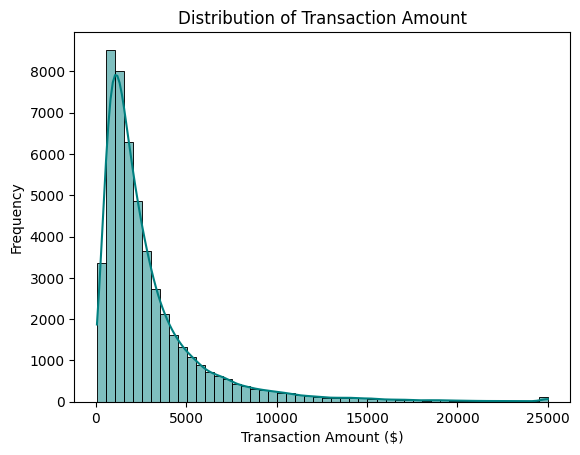

In [7]:
# ----------------------------
# Transaction Amount
# ----------------------------
sns.histplot(df['Transaction_Amount'], bins=50, kde=True, color="teal")
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()


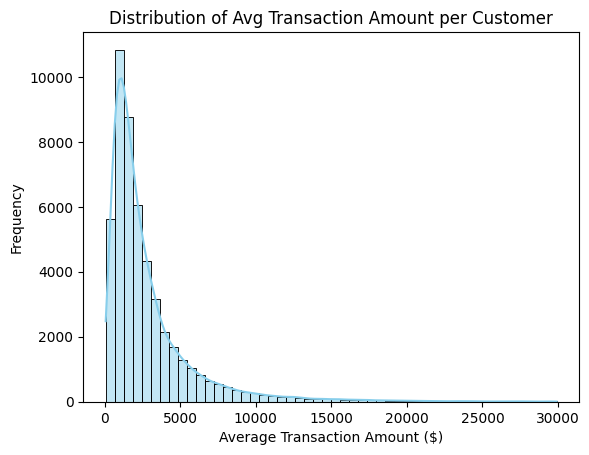

In [8]:
# ----------------------------
# Average Transaction Amount
# ----------------------------
sns.histplot(df['Avg_Transaction_Amount'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Avg Transaction Amount per Customer")
plt.xlabel("Average Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

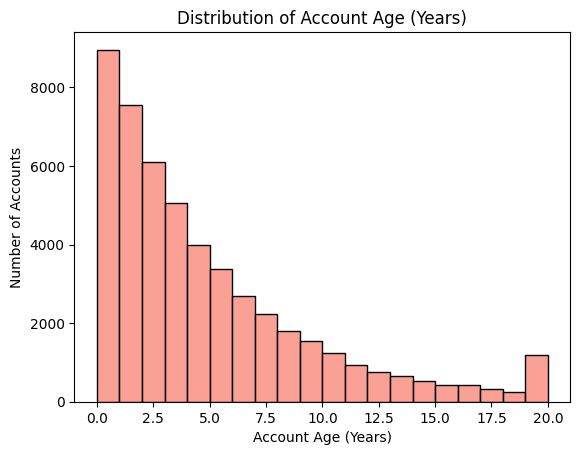

In [9]:
# ----------------------------
# Account Age
# ----------------------------
sns.histplot(df['Account_Age_Years'], bins=20, kde=False, color="salmon")
plt.title("Distribution of Account Age (Years)")
plt.xlabel("Account Age (Years)")
plt.ylabel("Number of Accounts")
plt.show()

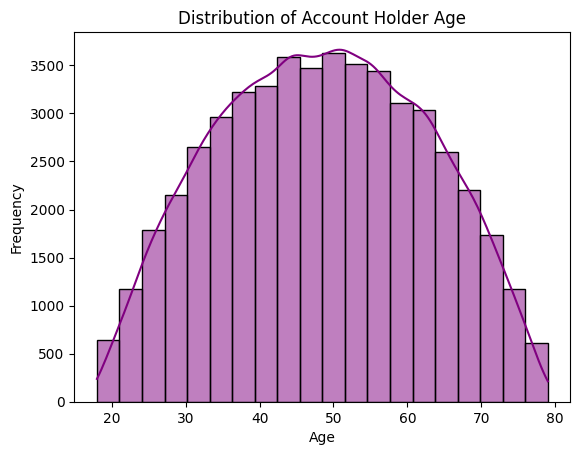

In [10]:
# ----------------------------
# Account Holder Age
# ----------------------------
sns.histplot(df['Account_Holder_Age'], bins=20, kde=True, color="purple")
plt.title("Distribution of Account Holder Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

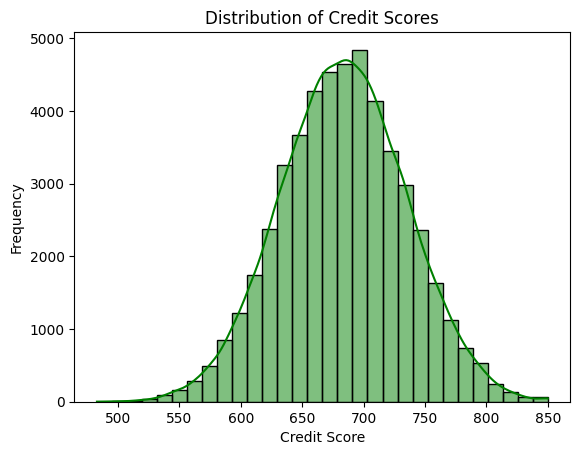

In [11]:
# ----------------------------
# Credit Score
# ----------------------------
sns.histplot(df['Credit_Score'], bins=30, kde=True, color="green")
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()


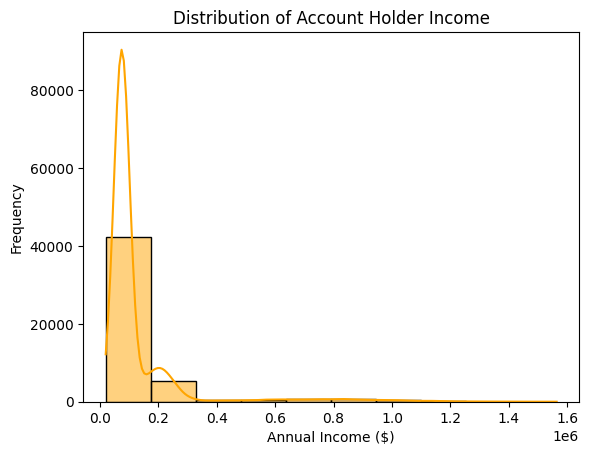

In [12]:
# ----------------------------
# Income
# ----------------------------
sns.histplot(df['Income'], bins=10, kde=True, color="orange")
plt.title("Distribution of Account Holder Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Frequency")
plt.show()

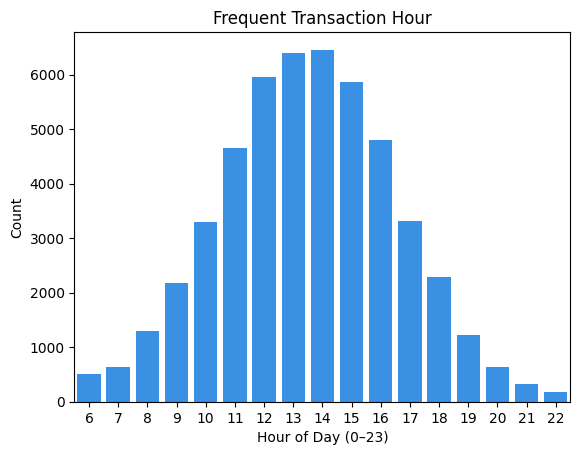

In [13]:
# ----------------------------
# Frequent Transaction Hour
# ----------------------------
sns.countplot(x=df['Frequent_Transaction_Hour'], color="dodgerblue")
plt.title("Frequent Transaction Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Count")
plt.show()

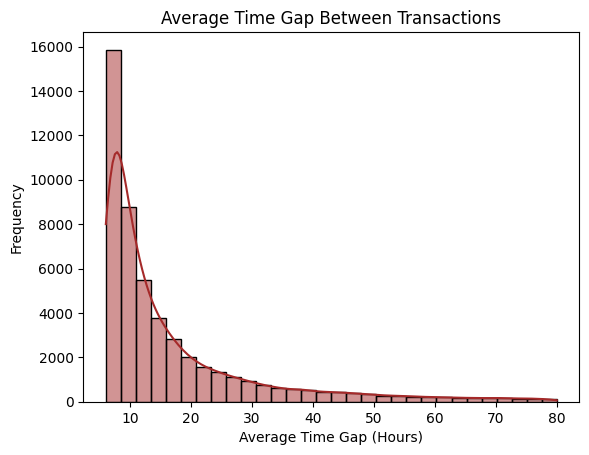

In [14]:
# ----------------------------
# Avg Time Gap (Hours)
# ----------------------------
sns.histplot(df['Avg_Time_Gap_Hours'], bins=30, kde=True, color="brown")
plt.title("Average Time Gap Between Transactions")
plt.xlabel("Average Time Gap (Hours)")
plt.ylabel("Frequency")
plt.show()

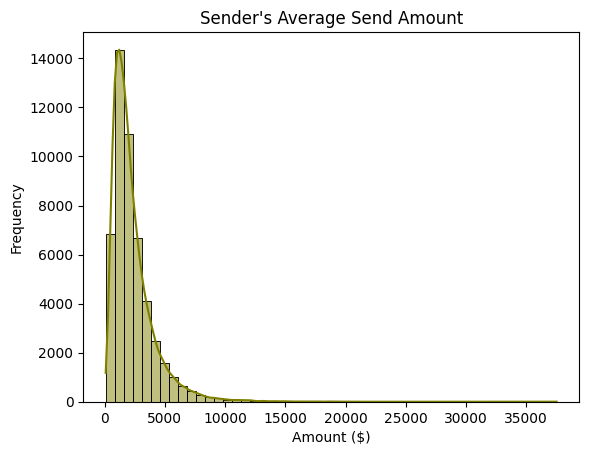

In [15]:
# ----------------------------
# Sender Average Send Amount
# ----------------------------
sns.histplot(df['Sender_Avg_Send_Amount'], bins=50, kde=True, color="olive")
plt.title("Sender's Average Send Amount")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-16-3720483616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Direction', data=df, palette="pastel")


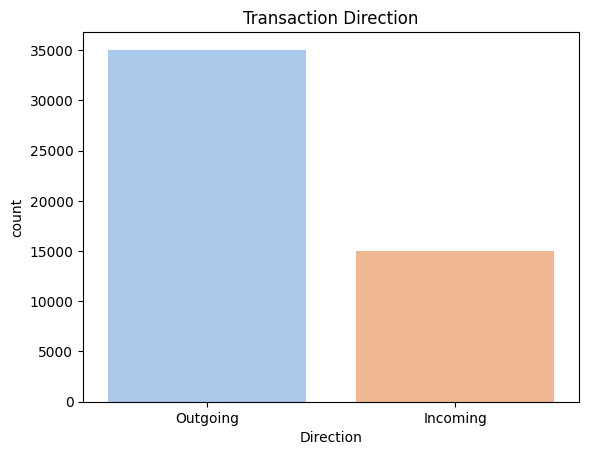

/tmp/ipython-input-16-3720483616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Transaction_Type', data=df, palette="Set2",


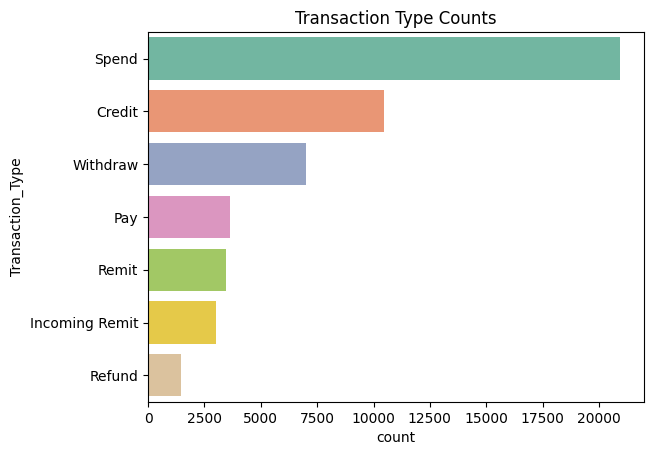

/tmp/ipython-input-16-3720483616.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=df, palette="Set3",


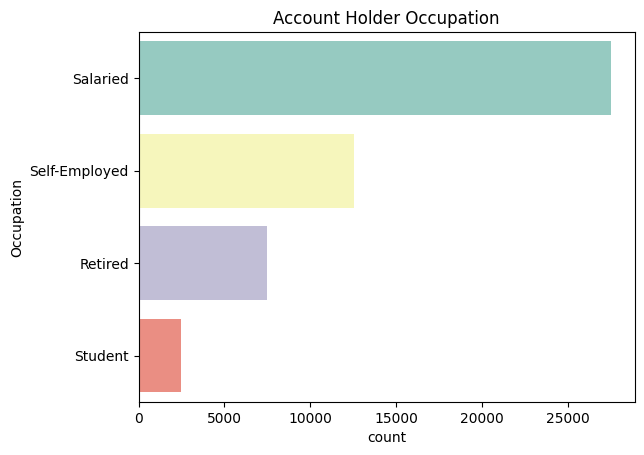

/tmp/ipython-input-16-3720483616.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Address_Changed_6M', data=df, palette="cool")


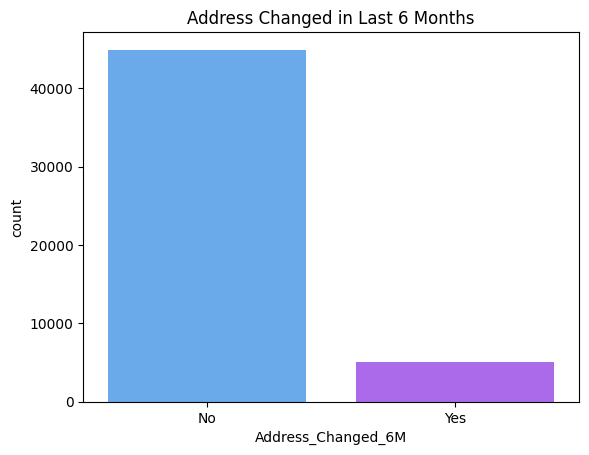

/tmp/ipython-input-16-3720483616.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Device_Type', data=df, palette="husl",


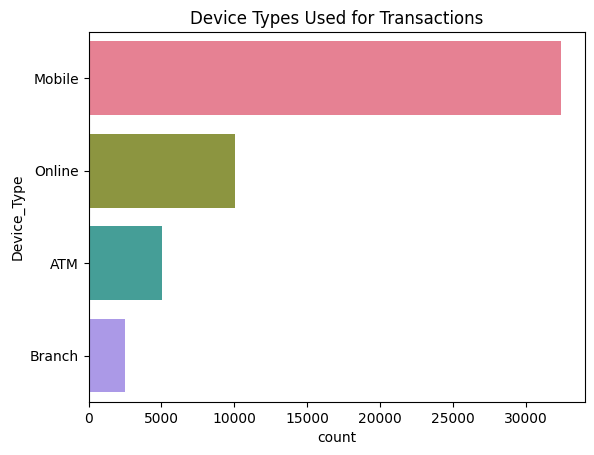

/tmp/ipython-input-16-3720483616.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Frequent_Device_Type', data=df, palette="husl",


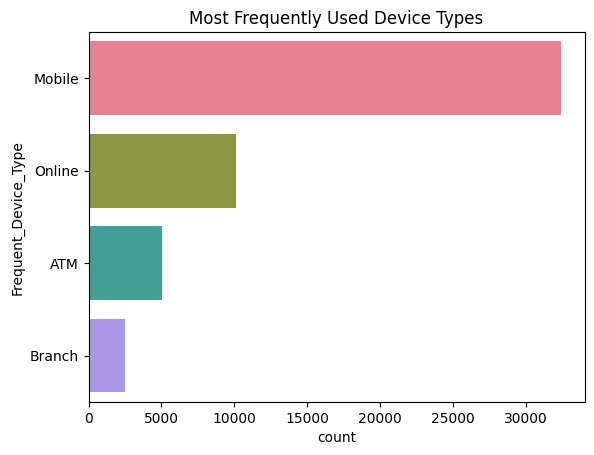

In [16]:
# Direction (Incoming / Outgoing)
sns.countplot(x='Direction', data=df, palette="pastel")
plt.title("Transaction Direction")
plt.show()

# Transaction Types
sns.countplot(y='Transaction_Type', data=df, palette="Set2",
              order=df['Transaction_Type'].value_counts().index)
plt.title("Transaction Type Counts")
plt.show()

# Occupation
sns.countplot(y='Occupation', data=df, palette="Set3",
              order=df['Occupation'].value_counts().index)
plt.title("Account Holder Occupation")
plt.show()

# Address Changed Recently
sns.countplot(x='Address_Changed_6M', data=df, palette="cool")
plt.title("Address Changed in Last 6 Months")
plt.show()

# Device Type
sns.countplot(y='Device_Type', data=df, palette="husl",
              order=df['Device_Type'].value_counts().index)
plt.title("Device Types Used for Transactions")
plt.show()

# Frequent Device Type
sns.countplot(y='Frequent_Device_Type', data=df, palette="husl",
              order=df['Frequent_Device_Type'].value_counts().index)
plt.title("Most Frequently Used Device Types")
plt.show()


## Insights and Interpretation

### Numerical Variables

The distribution of key numerical features indicates realistic patterns:

- **Transaction Amounts** are right-skewed, showing that while most transactions are small to moderate in size, a small number of large transactions raise the mean above the median. This is typical of customer spending behavior, especially when remittances and large one-time payments are included.
- **Average Transaction Amounts** also follow a right-skewed distribution for similar reasons, aligning with individual spending or transfer trends.
- **Account Age** shows a right-skewed pattern, indicating that most accounts are relatively new (0–5 years) while a smaller portion of customers hold long-standing accounts.
- **Account Holder Age** follows a roughly normal distribution, covering the full range from 18 to 80 years. Most account holders cluster between 30 and 60 years, which matches the profile of an active banking population.
- **Credit Score** is normally distributed, ranging from 500 to 850, with the majority falling between 650 and 750. This range reflects a healthy mix of low, medium, and high-risk customers.
- **Income** is right-skewed, highlighting that while most account holders have moderate annual incomes, there are a few high earners with significantly higher income levels, which increases the mean.
- **Frequent Transaction Hour** approximates a normal distribution centered between 11 AM and 3 PM, aligning with standard business hours when most transactions typically occur.
- **Average Time Gap Between Transactions** is right-skewed. This suggests that many customers perform frequent small transactions close together, while a smaller number have longer gaps between activities.
- **Average Send Amount by Sender** is also right-skewed, indicating that while most senders make low to moderate transfers, a few senders frequently send larger sums.

---

### Categorical Variables

Key categorical features show realistic distribution trends:

- **Device Type:** The majority of customers use mobile banking for transactions, highlighting the dominant role of mobile channels in modern banking. Online channels and ATMs follow, with branch visits being the least common.
- **Frequent Device Type:** This aligns closely with the primary device used — mobile banking remains the most commonly repeated channel for transactions.
- **Direction:** Most transactions are outgoing, reflecting typical consumer spending, payments, and remittances. Around 30% of transactions are incoming, representing salary credits, remittances received, or refunds.
- **Transaction Type:** Spending is the most common transaction type, followed by credits and withdrawals. Refunds and incoming remittances appear less frequently, which is realistic for standard customer activity.
- **Occupation:** Salaried individuals make up the majority of account holders, followed by self-employed and retired customers. Students form the smallest group, which aligns with real demographic trends.
- **Address Changes:** The majority of account holders do not change their address frequently, while a small portion has changed addresses within the past six months — a relevant detail for fraud flagging.



In [20]:
import pandas as pd
import numpy as np

# Example: load your dataset
# df = pd.read_csv("your_transactions.csv")

# Ensure Transaction_Time is parsed as datetime
df["Transaction_Time"] = pd.to_datetime(df["Transaction_Time"], errors="coerce")

# Create fraud flag columns
df["Flag_Blacklisted_Country"] = 0
df["Flag_LowIncome_HighSpend"] = 0
df["Flag_Student_HighOrFrequent"] = 0
df["Flag_SelfEmployed_HighNotFrequent"] = 0
df["Flag_Senior_HighOddHour"] = 0
df["Flag_Device_Mismatch"] = 0
df["Flag_City_Mismatch"] = 0
df["Flag_LowCredit_HighAmount"] = 0
df["Flag_NewAccount_HighAmount"] = 0
df["Flag_HighFrequency"] = 0
df["Flag_UnknownRelationship"] = 0
df["Flag_MissingDestination"] = 0

# Define thresholds and lists
blacklisted_countries = ["Nigeria", "Somalia", "North Korea"]
low_income_threshold = 40000
low_credit_threshold = 600
new_account_age_threshold = 1  # years
high_amount_threshold = 5000
frequent_gap_hours = 4

# Flag transactions to blacklisted countries
df["Flag_Blacklisted_Country"] = df["Destination_Country"].isin(blacklisted_countries).astype(int)

# Flag low-income customers spending more than 1.5x their average
df["Flag_LowIncome_HighSpend"] = np.where(
    (df["Income"] < low_income_threshold) &
    (df["Transaction_Amount"] > df["Avg_Transaction_Amount"] * 1.5),
    1, 0
)

# Flag students sending large amounts or too frequently
df["Flag_Student_HighOrFrequent"] = np.where(
    (df["Occupation"] == "Student") &
    (
        (df["Transaction_Amount"] > high_amount_threshold) |
        (df["Avg_Time_Gap_Hours"] < frequent_gap_hours)
    ),
    1, 0
)

# Flag self-employed making large transfers but infrequently
df["Flag_SelfEmployed_HighNotFrequent"] = np.where(
    (df["Occupation"] == "Self-Employed") &
    (df["Transaction_Amount"] > 10000) &
    (df["Avg_Time_Gap_Hours"] > 48),
    1, 0
)

# Extract hour from Transaction_Time
df["Hour"] = df["Transaction_Time"].dt.hour

# Flag seniors (age >= 60) making large transfers at odd hours
df["Flag_Senior_HighOddHour"] = np.where(
    (df["Account_Holder_Age"] >= 60) &
    (df["Transaction_Amount"] > high_amount_threshold) &
    ((df["Hour"] < 6) | (df["Hour"] > 22)),
    1, 0
)

# Flag when current device does not match frequent device type
df["Flag_Device_Mismatch"] = np.where(
    df["Device_Type"] != df["Frequent_Device_Type"],
    1, 0
)

# Flag if home branch city does not match transaction place (placeholder)
df["Flag_City_Mismatch"] = 0  # replace with real check if you have home branch city

# Flag low credit score customers transferring high amounts
df["Flag_LowCredit_HighAmount"] = np.where(
    (df["Credit_Score"] < low_credit_threshold) &
    (df["Transaction_Amount"] > high_amount_threshold),
    1, 0
)

# Flag newly opened accounts making high transfers
df["Flag_NewAccount_HighAmount"] = np.where(
    (df["Account_Age_Years"] < new_account_age_threshold) &
    (df["Transaction_Amount"] > high_amount_threshold),
    1, 0
)

# Flag high frequency if average time gap is very short
df["Flag_HighFrequency"] = np.where(
    df["Avg_Time_Gap_Hours"] < frequent_gap_hours,
    1, 0
)

# Flag unknown relationship types
df["Flag_UnknownRelationship"] = np.where(
    df["Relationship_Type"].str.lower() == "unknown",
    1, 0
)

# Flag missing destination country for remits
df["Flag_MissingDestination"] = np.where(
    (df["Transaction_Type"].str.lower().str.contains("remit")) &
    (df["Destination_Country"].isnull()),
    1, 0
)

# Total suspicious flags
df["Total_Flags"] = df[[
    "Flag_Blacklisted_Country",
    "Flag_LowIncome_HighSpend",
    "Flag_Student_HighOrFrequent",
    "Flag_SelfEmployed_HighNotFrequent",
    "Flag_Senior_HighOddHour",
    "Flag_Device_Mismatch",
    "Flag_City_Mismatch",
    "Flag_LowCredit_HighAmount",
    "Flag_NewAccount_HighAmount",
    "Flag_HighFrequency",
    "Flag_UnknownRelationship",
    "Flag_MissingDestination"
]].sum(axis=1)

# Assign Transaction_Status with multi-level logic
df["Transaction_Status"] = "Approve"
df["Reason"] = ""

# Serious direct hold: blacklisted, seniors odd hour, new account high, low credit high
hold_condition = (
    (df["Flag_Blacklisted_Country"] == 1) |
    (df["Flag_Senior_HighOddHour"] == 1) |
    (df["Flag_NewAccount_HighAmount"] == 1) |
    (df["Flag_LowCredit_HighAmount"] == 1)
)

df.loc[hold_condition, "Transaction_Status"] = "Hold"
df.loc[hold_condition, "Reason"] = "High Risk: direct hold condition"

# Agent Review: missing info or suspicious mismatch that could be cleared
agent_condition = (
    (df["Transaction_Status"] == "Approve") &
    (
        (df["Flag_UnknownRelationship"] == 1) |
        (df["Flag_MissingDestination"] == 1) |
        (df["Flag_Device_Mismatch"] == 1)
    )
)

df.loc[agent_condition, "Transaction_Status"] = "Agent Review"
df.loc[agent_condition, "Reason"] = "Needs manual check: data missing or mismatch"

# Fallback: hold if still other flags
fallback_condition = (
    (df["Transaction_Status"] == "Approve") & (df["Total_Flags"] > 0)
)

df.loc[fallback_condition, "Transaction_Status"] = "Agent Review"
df.loc[fallback_condition, "Reason"] = "Other multiple flags"

# Final: keep Approve if no flags

# Preview flagged transactions
print("Transactions needing Hold:", (df["Transaction_Status"] == "Hold").sum())
print("Transactions for Agent Review:", (df["Transaction_Status"] == "Agent Review").sum())

print(df[df["Transaction_Status"] != "Approve"][[
    "Transaction_ID",
    "Transaction_Amount",
    "Income",
    "Occupation",
    "Credit_Score",
    "Account_Age_Years",
    "Avg_Time_Gap_Hours",
    "Device_Type",
    "Frequent_Device_Type",
    "Destination_Country",
    "Relationship_Type",
    "Total_Flags",
    "Transaction_Status",
    "Reason"
]].head())

df.to_csv("transactions_with_flags_final.csv", index=False)


Transactions needing Hold: 2049
Transactions for Agent Review: 10891
                          Transaction_ID  Transaction_Amount  Income  \
2   28df6ec4-ce4a-4bbd-8241-330b01a9e71f              806.52  155970   
5   614ff3d7-19db-4ad0-9dd1-dfb23b982ef8             3097.96  112723   
11  ae270da7-02f0-4b90-b143-262fdc5c0eed              724.60   86417   
16  8a0f4efb-edcd-465e-b638-6821f6e07cc0             3567.72  100553   
18  080aadfb-e7c9-4b26-9141-25c63a9bedd4             5397.56  176448   

       Occupation  Credit_Score  Account_Age_Years  Avg_Time_Gap_Hours  \
2   Self-Employed           646                  0                7.24   
5        Salaried           708                 14               16.98   
11  Self-Employed           736                  3               15.48   
16  Self-Employed           670                 20                7.76   
18       Salaried           691                  0                6.31   

   Device_Type Frequent_Device_Type Destination_Count

In [21]:
df.head()

,Transaction_ID,Direction,Transaction_Type,Transaction_Amount,Avg_Transaction_Amount,Account_Age_Years,Account_Holder_Age,Occupation,Credit_Score,Income,...,Flag_City_Mismatch,Flag_LowCredit_HighAmount,Flag_NewAccount_HighAmount,Flag_HighFrequency,Flag_UnknownRelationship,Hour,Total_Flags,Transaction_Status,Flag_MissingDestination,Reason
0,23b8c1e9-3924-46de-beb1-3b9046685257,Outgoing,Pay,2260.26,2382.40,1,65,Self-Employed,603,64496,...,0,0,0,0,0,10,0,Approve,0,
1,8fadc1a6-06cb-4fb3-9a1d-e644815ef6d1,Outgoing,Spend,1509.27,1185.17,0,44,Self-Employed,618,91450,...,0,0,0,0,0,21,0,Approve,0,
2,28df6ec4-ce4a-4bbd-8241-330b01a9e71f,Incoming,Incoming Remit,806.52,673.99,0,44,Self-Employed,646,155970,...,0,0,0,0,0,17,1,Agent Review,1,Needs manual check: data missing or mismatch
3,9a8dca03-580d-4b71-98f5-64135be6128e,Incoming,Credit,1411.81,1217.82,0,43,Salaried,756,82227,...,0,0,0,0,0,20,0,Approve,0,
4,e2acf72f-9e57-4f7a-a0ee-89aed453dd32,Outgoing,Withdraw,5897.69,4803.07,8,53,Salaried,692,64964,...,0,0,0,0,0,16,0,Approve,0,


Flag counts:
 Flag_UnknownRelationship             5011
Flag_Device_Mismatch                 3993
Flag_MissingDestination              3008
Flag_NewAccount_HighAmount           1367
Flag_Blacklisted_Country              441
Flag_Student_HighOrFrequent           377
Flag_LowCredit_HighAmount             355
Flag_Senior_HighOddHour                27
Flag_SelfEmployed_HighNotFrequent      18
Flag_LowIncome_HighSpend                0
Flag_City_Mismatch                      0
Flag_HighFrequency                      0
dtype: int64


/tmp/ipython-input-22-2378546074.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flag_counts.index, y=flag_counts.values, palette="viridis")


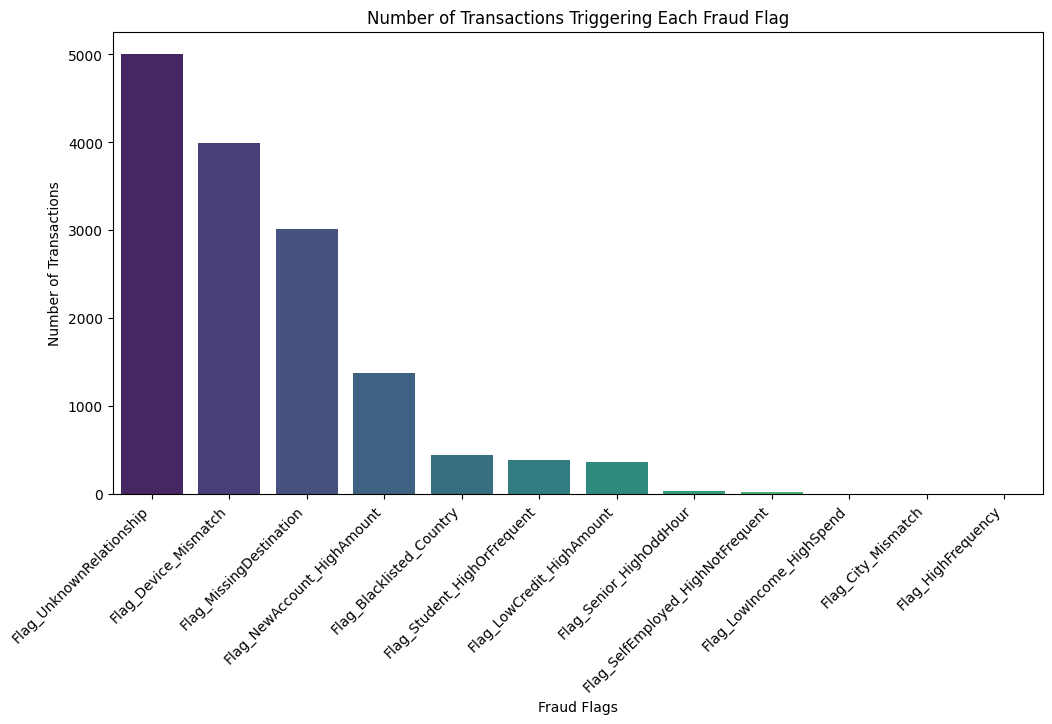


Transactions with multiple flags:
 Total_Flags
2    1454
3      95
4       3
5       1
Name: count, dtype: int64


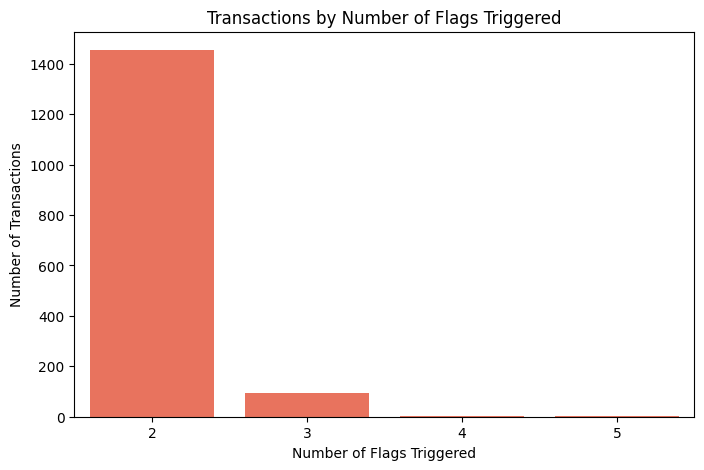


Transaction status counts:
 Transaction_Status
Approve         37060
Agent Review    10891
Hold             2049
Name: count, dtype: int64


/tmp/ipython-input-22-2378546074.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Set2")


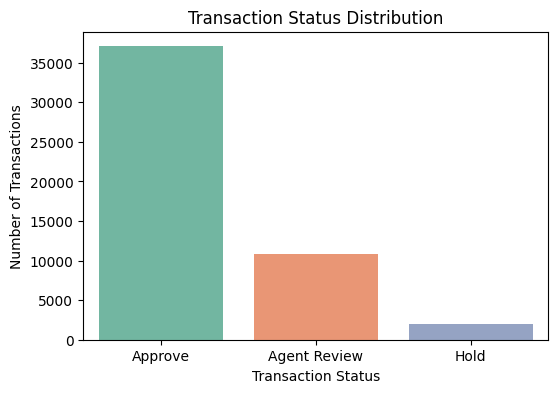


Flags breakdown by Transaction Status:
 Transaction_Status                 Agent Review  Approve  Hold
Flag_Blacklisted_Country                      0        0   441
Flag_LowIncome_HighSpend                      0        0     0
Flag_Student_HighOrFrequent                 283        0    94
Flag_SelfEmployed_HighNotFrequent             8        0    10
Flag_Senior_HighOddHour                       0        0    27
Flag_Device_Mismatch                       3816        0   177
Flag_City_Mismatch                            0        0     0
Flag_LowCredit_HighAmount                     0        0   355
Flag_NewAccount_HighAmount                    0        0  1367
Flag_HighFrequency                            0        0     0
Flag_UnknownRelationship                   4786        0   225
Flag_MissingDestination                    2941        0    67


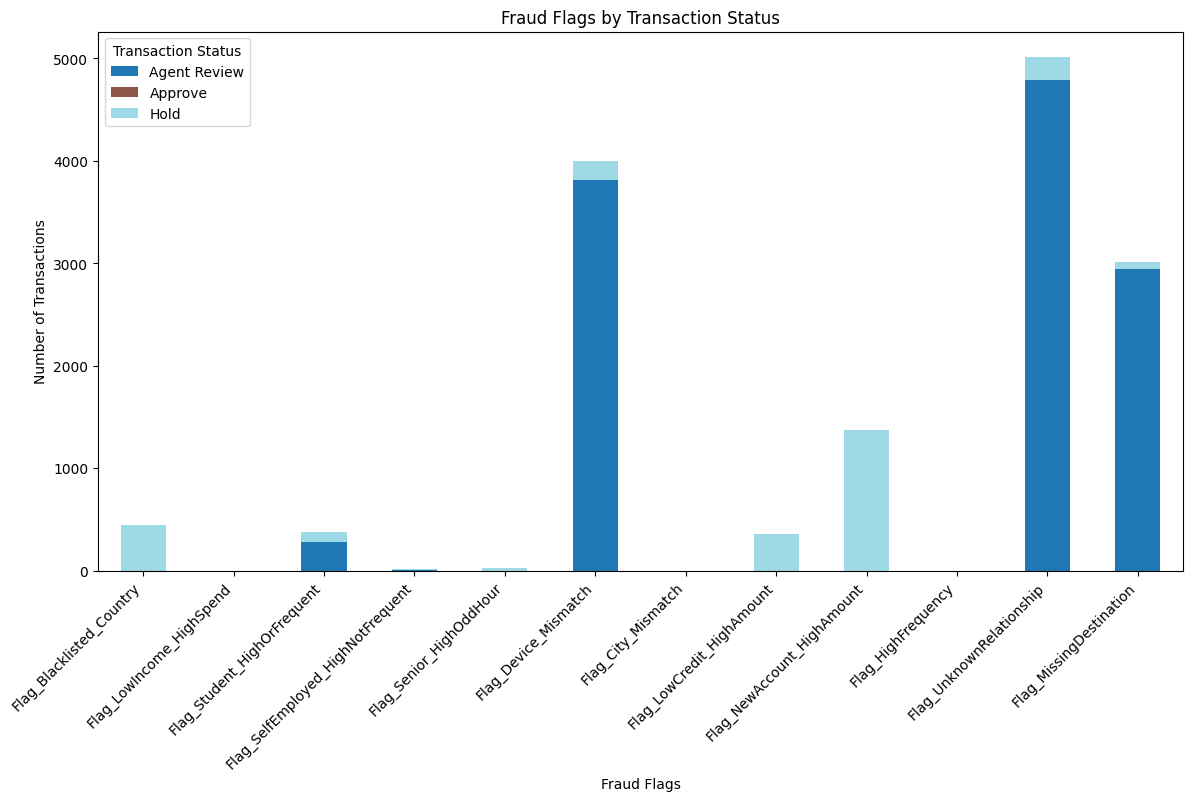

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many transactions triggered each flag
flag_cols = [
    "Flag_Blacklisted_Country",
    "Flag_LowIncome_HighSpend",
    "Flag_Student_HighOrFrequent",
    "Flag_SelfEmployed_HighNotFrequent",
    "Flag_Senior_HighOddHour",
    "Flag_Device_Mismatch",
    "Flag_City_Mismatch",
    "Flag_LowCredit_HighAmount",
    "Flag_NewAccount_HighAmount",
    "Flag_HighFrequency",
    "Flag_UnknownRelationship",
    "Flag_MissingDestination"
]

flag_counts = df[flag_cols].sum().sort_values(ascending=False)
print("Flag counts:\n", flag_counts)

# Plot flag counts
plt.figure(figsize=(12,6))
sns.barplot(x=flag_counts.index, y=flag_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Number of Transactions Triggering Each Fraud Flag")
plt.ylabel("Number of Transactions")
plt.xlabel("Fraud Flags")
plt.show()

# How many transactions triggered multiple flags
multi_flags = df[df["Total_Flags"] > 1]["Total_Flags"].value_counts().sort_index()
print("\nTransactions with multiple flags:\n", multi_flags)

plt.figure(figsize=(8,5))
sns.barplot(x=multi_flags.index, y=multi_flags.values, color="tomato")
plt.title("Transactions by Number of Flags Triggered")
plt.xlabel("Number of Flags Triggered")
plt.ylabel("Number of Transactions")
plt.show()

# Distribution of Transaction Status
status_counts = df["Transaction_Status"].value_counts()
print("\nTransaction status counts:\n", status_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Set2")
plt.title("Transaction Status Distribution")
plt.ylabel("Number of Transactions")
plt.xlabel("Transaction Status")
plt.show()

# Optional: Cross-tab of flags vs Transaction Status
cross_tab = df.groupby("Transaction_Status")[flag_cols].sum().T
print("\nFlags breakdown by Transaction Status:\n", cross_tab)

cross_tab.plot(kind="bar", stacked=True, figsize=(14,7), colormap="tab20")
plt.title("Fraud Flags by Transaction Status")
plt.ylabel("Number of Transactions")
plt.xlabel("Fraud Flags")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Transaction Status")
plt.show()


## Fraud Flagging & Transaction Risk Analysis

### Fraud Flagging Logic

To strengthen fraud detection, a set of targeted **risk flags** has been developed. These flags capture suspicious or unusual transaction patterns by combining bivariate conditions such as account holder profile, transaction attributes, and behavioral anomalies.

**Key risk scenarios covered include:**
- **Blacklisted Countries:** Transactions to or from countries with known high fraud risk.
- **Low-Income High Spend:** Customers with low declared income performing unusually high transactions.
- **Students & High Transfers:** Student account holders making large remittances or unusually frequent transfers.
- **Self-Employed Large One-Off Transfers:** Large transfers from self-employed individuals with low frequency.
- **Seniors with High Odd-Hour Transfers:** Account holders aged 60+ making large transactions at odd hours.
- **Device Mismatch:** Current transaction device differs from the customer’s usual device.
- **City Mismatch:** (Reserved for future use) Home branch city and transaction city do not match.
- **Low Credit Score High Transfers:** Large transfers by customers with low credit scores.
- **New Accounts High Transfers:** Recently opened accounts moving unusually high amounts.
- **High Frequency:** Transactions occurring much more frequently than the customer’s normal average gap.
- **Unknown Relationship Type:** Beneficiary relationship details are missing or unclear.
- **Missing Destination for Remits:** Remittance transactions lacking a clear destination country.

Each flag acts as an indicator for potential fraud, money laundering, or suspicious activity that needs extra review.

---

### Flag Distribution Insights

After applying this logic to the dataset, the following insights were observed:

- **Most frequent flags:**
  - `Flag_UnknownRelationship`: **5,011** transactions flagged due to missing or unclear beneficiary relationships.
  - `Flag_Device_Mismatch`: **3,993** transactions showed device anomalies.
  - `Flag_MissingDestination`: **3,008** remittance transactions lacked destination information.
- **High-Risk Direct Holds:**
  - `Flag_NewAccount_HighAmount`: **1,367** new accounts moving large amounts.
  - `Flag_Blacklisted_Country`: **441** transactions linked to blacklisted countries.
  - `Flag_LowCredit_HighAmount`: **355** high-value transactions by low credit score customers.
  - `Flag_Senior_HighOddHour`: **27** seniors making high transactions at odd hours.
- Other moderate flags:
  - `Flag_Student_HighOrFrequent`: **377**
  - `Flag_SelfEmployed_HighNotFrequent`: **18**

Some conditions like `LowIncome_HighSpend`, `City_Mismatch`, or `HighFrequency` did not trigger with the current thresholds but are retained for future monitoring.

---

### Transaction Risk Status

Based on the flags, transactions were assigned to:

- **Hold** (**2,049 transactions**): High-risk cases requiring immediate investigation (e.g., blacklisted countries, high amount new accounts, vulnerable seniors).
- **Agent Review** (**10,891 transactions**): Incomplete or mismatched details that can be resolved with verification (e.g., unknown relationship, missing destination).
- **Approve** (**37,060 transactions**): No significant flags under the current risk rules.

**Multiple Flags:**  
- **1,454** transactions triggered 2 flags.  
- **95** triggered 3 flags.  
- **3** triggered 4 flags.  
- **1** transaction triggered **5 separate flags**, highlighting a complex risk profile.




Correlation Matrix:
                           Transaction_Amount  Avg_Transaction_Amount  \
Transaction_Amount                   1.000000                0.978888   
Avg_Transaction_Amount               0.978888                1.000000   
Account_Age_Years                   -0.003859               -0.004974   
Account_Holder_Age                  -0.000475               -0.001562   
Credit_Score                        -0.000970               -0.000332   
Income                               0.003603                0.004537   
Frequent_Transaction_Hour            0.000345               -0.000203   
Avg_Time_Gap_Hours                  -0.002101               -0.002954   
Sender_Avg_Send_Amount               0.004096                0.003034   

                           Account_Age_Years  Account_Holder_Age  \
Transaction_Amount                 -0.003859           -0.000475   
Avg_Transaction_Amount             -0.004974           -0.001562   
Account_Age_Years                   1.000000 

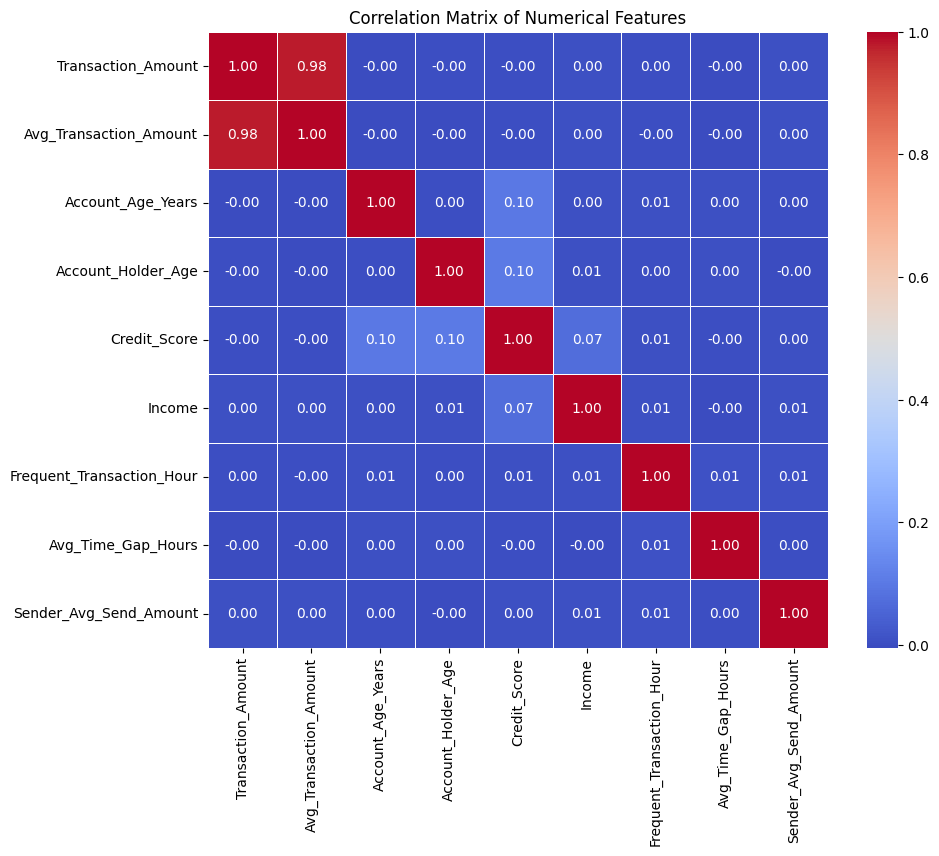

In [23]:


# Select numerical columns for correlation
num_cols = [
    "Transaction_Amount",
    "Avg_Transaction_Amount",
    "Account_Age_Years",
    "Account_Holder_Age",
    "Credit_Score",
    "Income",
    "Frequent_Transaction_Hour",
    "Avg_Time_Gap_Hours",
    "Sender_Avg_Send_Amount"
]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()



## Correlation Analysis

The correlation matrix shows that most numerical variables in this dataset are only weakly correlated with each other.

**Key observations:**
- There is a strong positive correlation between `Transaction_Amount` and `Avg_Transaction_Amount`. This is expected, since customers with a history of higher average transaction sizes tend to make larger individual transactions.
- Other variables, including `Account_Age_Years`, `Account_Holder_Age`, `Credit_Score`, `Income`, `Frequent_Transaction_Hour`, `Avg_Time_Gap_Hours`, and `Sender_Avg_Send_Amount`, show minimal or no strong linear correlation with each other.
- This indicates that individual customer profile features and behavioral transaction patterns are largely independent in this dataset.

**Implication:**  
This low multicollinearity is useful for fraud profiling — it suggests that each feature may contribute unique information when flagging suspicious behavior. For example, unusual combinations of age, income, device, and transaction time can reveal fraud signals that wouldn’t be obvious from any single factor alone.




## Project Summary & Business Impact

This project demonstrates a complete fraud risk profiling workflow for a banking transaction dataset. The primary business problem addressed here is the detection of potentially fraudulent or suspicious transactions in order to reduce financial losses, protect customers, and maintain compliance with anti-money laundering (AML) and regulatory obligations.

**Key steps accomplished:**
- **Detailed Exploratory Data Analysis (EDA):** Helped us understand customer demographics, transaction behavior, and outliers.
- **Bivariate & Correlation Analysis:** Identified how multiple customer and transaction factors interact to expose hidden fraud risks.
- **Custom Fraud Flagging Framework:** Designed and implemented clear, explainable risk flags based on real-world fraud scenarios, including unusual transaction patterns, high-risk customer profiles, and behavioral mismatches.
- **Risk-Based Transaction Statusing:** Classified transactions into `Approve`, `Agent Review`, or `Hold` based on their risk profile. This reduces false positives and ensures that only truly suspicious cases consume valuable investigation resources.

**Business implications:**
- By proactively flagging transactions with weak or missing information, mismatches, or high-risk attributes, the bank can intervene earlier to block fraud attempts and request additional verification from customers.
- Automating straightforward high-risk rules helps compliance teams focus their effort on complex or borderline cases, improving investigation efficiency.
- Profiling transactions in this way reduces operational costs, prevents reputational damage from fraud losses, and builds customer trust through stronger security.
- The same framework can be scaled and integrated with machine learning models for continuous learning and improvement as fraud patterns evolve.

**Outcome:**
This analysis delivers a robust foundation for risk-based transaction monitoring. It combines clear, auditable rule-based logic with data-driven insights that align with real-world banking risk policies. The result is a practical, actionable approach that helps the business protect its financial assets and customers — while maintaining smooth, secure banking operations.
